In [1]:
import sys
sys.path.append('/home/youzhi/python-projects/sp-project/code')

In [2]:
spdir = "/home/youzhi/python-projects/sp-project"

In [19]:
import torch 
import os
import PmPNet as PN
import matplotlib.pyplot as plt

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 200
num_epochs = 100
learning_rate = 1e-3

# Paths for different folders, data and result folders
datadir= f"{spdir}/Data/combined_readindata"
wdir= f"{spdir}/Train_PN_result_sP"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train 

In [25]:
# read in the training data 
train_loader, test_loader = PN.readin_data_train(datadir,"c_readindata",batch_size)

size of data:  401


/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [21]:
# train PmPNet
PN.NetTrain(wdir,"train_PN_log","net_PN_model",train_loader,learning_rate,num_epochs,batch_size,device)

Epoch [1/100], Step [1/3] Loss1: 4.290573,Loss2: 2.448494,Loss3: 0.356738
Epoch [2/100], Step [1/3] Loss1: 1.533386,Loss2: 1.957982,Loss3: 0.831119
Epoch [3/100], Step [1/3] Loss1: 0.875818,Loss2: 1.660063,Loss3: 0.551134
Epoch [4/100], Step [1/3] Loss1: 0.608461,Loss2: 1.515209,Loss3: 0.402588
Epoch [5/100], Step [1/3] Loss1: 0.445989,Loss2: 1.404074,Loss3: 0.272228
Epoch [6/100], Step [1/3] Loss1: 0.406872,Loss2: 1.083614,Loss3: 0.202534
Epoch [7/100], Step [1/3] Loss1: 0.376007,Loss2: 0.892449,Loss3: 0.193658
Epoch [8/100], Step [1/3] Loss1: 0.325884,Loss2: 0.636979,Loss3: 0.167564
Epoch [9/100], Step [1/3] Loss1: 0.307945,Loss2: 0.471269,Loss3: 0.211674
Epoch [10/100], Step [1/3] Loss1: 0.284208,Loss2: 0.314834,Loss3: 0.183563
Epoch [11/100], Step [1/3] Loss1: 0.264525,Loss2: 0.229087,Loss3: 0.185207
Epoch [12/100], Step [1/3] Loss1: 0.262669,Loss2: 0.151976,Loss3: 0.151937
Epoch [13/100], Step [1/3] Loss1: 0.251511,Loss2: 0.107055,Loss3: 0.133363
Epoch [14/100], Step [1/3] Loss1: 

In [22]:
# model evaluation on test data
PN.netevalu(wdir,"net_PN_model","prcurve_file","predict_PN_file",test_loader,device);

tensor([-3.0342,  0.5963, -6.1906, -7.6390, -0.7251, -3.0339, -4.8170, -8.1215,
        -7.0461, -0.7495, -2.7937, -6.0155, -3.2152, -9.4669, -3.4815, -0.1813,
         0.0295,  3.2362, -6.0710, -5.7238, -4.4702, -7.3841, -0.6822, -3.4970,
        -6.2928, -8.1669, -2.7011, -3.1323, -5.6084, -7.6224, -4.9298, -6.7242,
        -3.4173, -2.4906, -7.1528, -5.5554, -1.5879,  3.3331, -5.0813, -9.8731,
        -1.9899, -4.9514, -6.1689, -6.3102, -7.7847, -2.9529,  1.7186, -4.0437,
         3.1798,  2.3707, -7.0933, -4.1347, -6.6191, -1.6707, -8.4015, -7.1637,
        -5.9637, -5.9013, -1.6885, -6.5069, -6.2614, -4.8897, -8.5842,  0.8434,
        -5.8884, -4.3138,  1.0100,  1.4275, -5.2794, -3.8446, -6.5873, -9.4621,
        -3.2435,  1.9378, -4.7585, -5.2219, -5.1641, -0.1912, -0.1484, -8.0155,
        -4.0340, -5.5972, -1.9318, -3.8141, -3.5147, -4.2625, -6.2603, -5.6221,
        -6.3445,  2.9175, -5.8017, -7.0390,  1.5737, -3.7113, -4.4483, -3.5685,
        -3.4768, -1.0515, -7.5539, -4.30

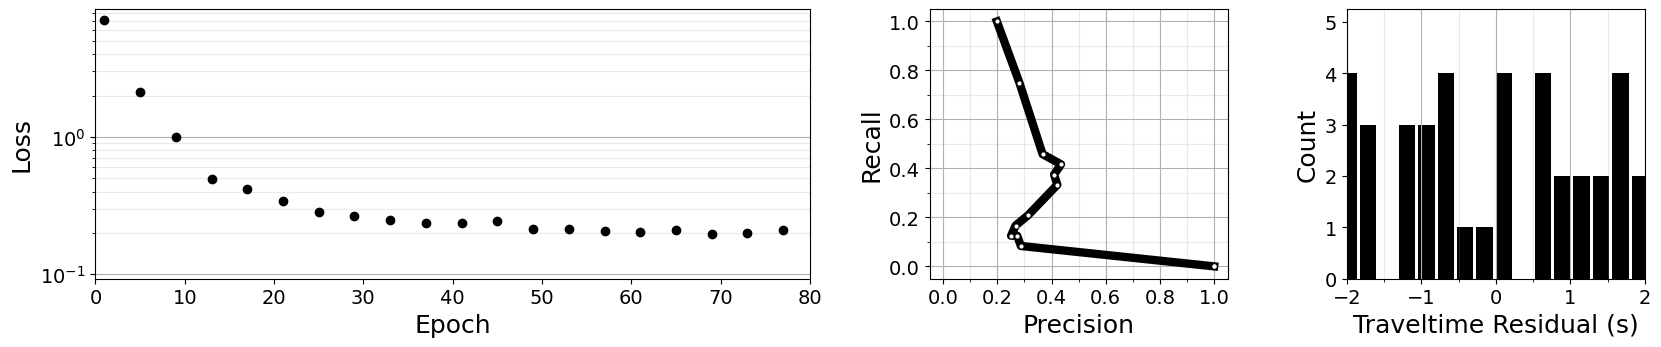

In [23]:
# quickly visualize the result
PN.plot_modeva(wdir,"train_PN_log","prcurve_file","predict_PN_file","plot_PN_modevalu")

## Verify latent variable

tensor([1.0000, 0.0897])


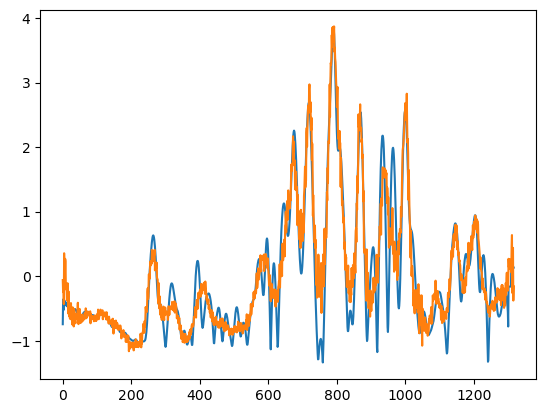

tensor([ 0.0000, -0.1671])


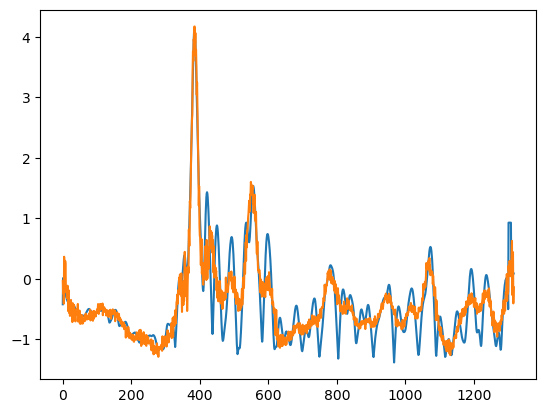

tensor([ 0.0000, -0.0049])


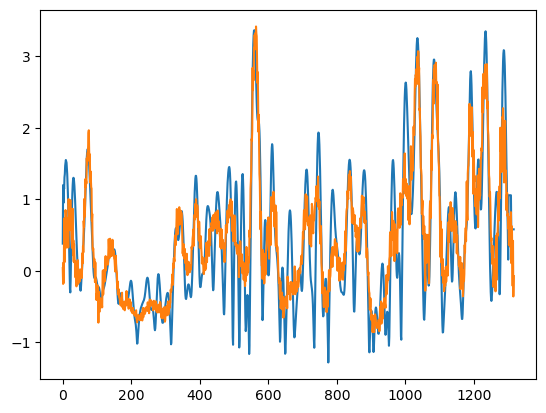

tensor([ 0.0000, -0.1566])


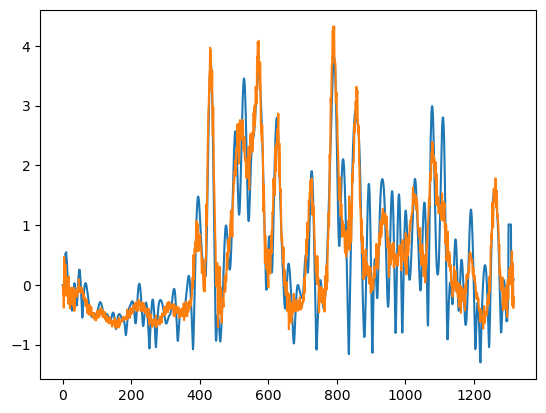

tensor([0.0000, 0.1300])


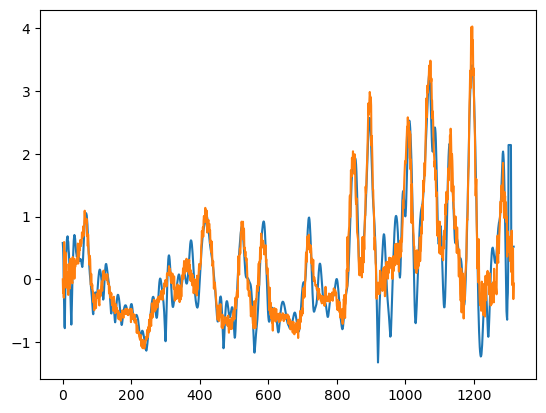

tensor([ 0.0000, -0.1566])


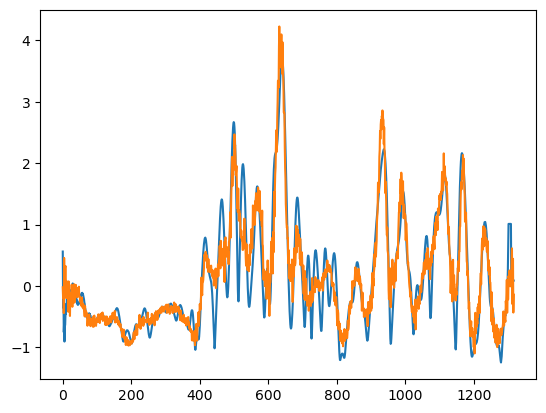

tensor([0.0000, 0.0433])


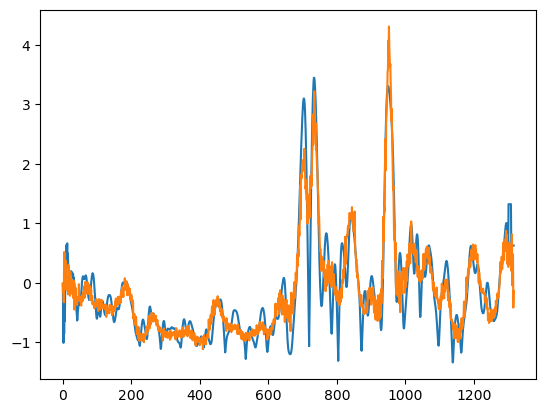

tensor([1.0000, 0.0196])


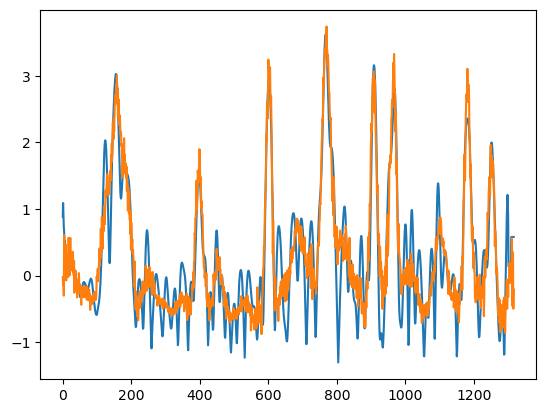

tensor([0.0000, 0.1979])


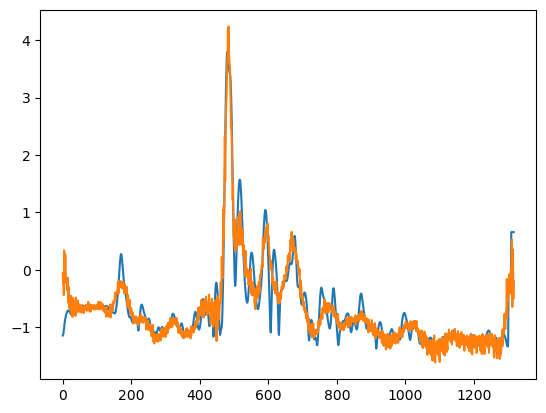

tensor([ 0.0000, -0.1292])


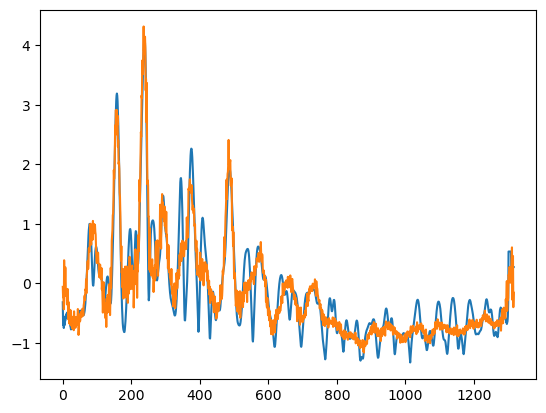

In [24]:
model = PN.ResnetEncoder(PN.BasicBlock, PN.DecodeBlock, [2, 2], 2)
model.load_state_dict(torch.load(f"{wdir}/net_PN_model"))
model.cuda()


for signals, labels in test_loader:
    
    signals = signals.to(device)
    
    labels = labels.to(device)
    
    latents = model.encode(signals)
    
    outputs = model.decode(latents)
    #move outputs back to cpu
    outputs = outputs.detach().cpu()
    signals = signals.detach().cpu()
    labels = labels.detach().cpu()
    #plt.show()
    for i in range(0, 10):
        print(labels[i])
        plt.plot(signals[i][0])
        plt.plot(outputs[i][0])
        plt.show()

# Apply pre-trained PmPNet to identify PmP phase on real data

### Applied to a certain year

In [10]:
# read in the real data 
test_loader = PN.readin_`data_real(datadir,"ValidationData_2015",batch_size)

In [11]:
PN.netpredict(datadir,"ValidationData_2015",wdir,"net_PN_model","predict_PN_file_2015",test_loader,device)

NO.: 0   ID: 37272439   PmP_Prob: 0.323879  PmP_Time: 20.893116  dist: 127.9   evdp: 11.59   mag: 2.1  evtnm: 20151113_1204.CI.DTP
NO.: 1   ID: 37198399   PmP_Prob: 0.000000  PmP_Time: 17.361309  dist: 103.3   evdp: 18.04   mag: 2.3  evtnm: 20150705_1315.CI.SYN
NO.: 2   ID: 37150703   PmP_Prob: 0.000001  PmP_Time: 14.302899  dist: 76.6   evdp: 6.28   mag: 2.4  evtnm: 20150423_1454.CI.TOR
NO.: 3   ID: 37501608   PmP_Prob: 0.000037  PmP_Time: 13.073999  dist: 60.6   evdp: 2.31   mag: 2.2  evtnm: 20151214_0708.CI.DPP
NO.: 4   ID: 37508080   PmP_Prob: 0.000002  PmP_Time: 19.669258  dist: 111.8   evdp: 2.76   mag: 2.3  evtnm: 20151230_1027.CI.JVA
NO.: 5   ID: 37148391   PmP_Prob: 0.000000  PmP_Time: 16.840071  dist: 91.2   evdp: -0.18   mag: 2.3  evtnm: 20150420_0231.CI.HEC
NO.: 6   ID: 37305208   PmP_Prob: 0.000026  PmP_Time: 24.993418  dist: 151.4   evdp: 6.62   mag: 2.5  evtnm: 20150114_1203.CI.SYP
NO.: 7   ID: 37301936   PmP_Prob: 0.000000  PmP_Time: 26.983143  dist: 170.9   evdp: 8.30 

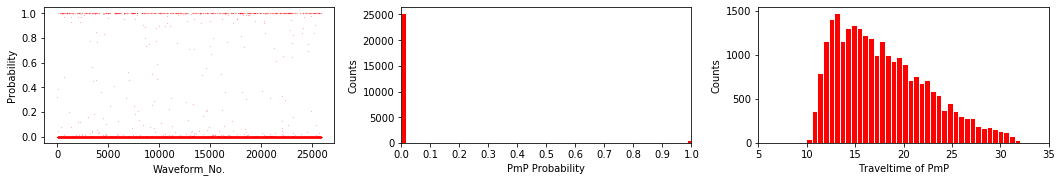

In [2]:
PN.plot_modpredict(wdir,"predict_PN_file_2015","plot_PN_predict2015")